In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
cd ../../Pickled_from_mongo/

/home/jovyan/capstone-52/Pickled_from_mongo


In [6]:
ls

combined_eg_gulf_1k_sample.p  combined_eg_gulf_200k_sample.p


In [113]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf_200k_sample.p')

In [114]:
df.head()

,_id,cleaned_geo,cleaned_name,cleaned_text,class
0,5a2c7a44204c9e0400cdc0e2,None,kamal,أزاي أقول لك كنا زمان والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ح يفوت علينا ولا ندري,EG
1,5a2c7a44204c9e0400cdc0e3,Egypt,agabdelrehim,هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…,EG
2,5a2c7a44204c9e0400cdc0e4,None,ElsndubadE,أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…,EG
3,5a2c7a44204c9e0400cdc0e5,None,h_sawires,أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر,EG
4,5a2c7a44204c9e0400cdc0e6,Egypt,Hagerelmor,التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك,EG


In [115]:
df = df.drop(['_id', 'cleaned_geo','cleaned_name'], axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192936 entries, 0 to 95683
Data columns (total 2 columns):
cleaned_text    192936 non-null object
class           192936 non-null object
dtypes: object(2)
memory usage: 4.4+ MB


In [117]:
df.sample(5)

,cleaned_text,class
50779,مقاطعه المدرج في المباريات السابقه كانت رساله للأعبين بأن الجمهور زعلان ، وصلت رسالتنا فكان الرد برساله من بعض الا…,GULF
7561,كل التقدير والتوفيق لأخي محمد بن راشد في قيادة حكومة المستقبل، متطلعين معه الى تحقيق الأهداف الاستراتيجية لمئوية الاما…,GULF
71072,تويت عن احسن ذكريات حياتنا مع صحابك,EG
82645,السعد الأمير بن سلمان يقدم مكافأة تاريخية للاعبي السعودي بعد التأهل لـ العالم في روسيا…,GULF
36930,دنا هتشل,EG


In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder()
df['class_numerical'] = le.fit_transform(df['class'])

In [20]:
df = df.drop(['class'], axis=1)

In [120]:
df.sample(6)

,cleaned_text,class,class_numerical
48462,بكرة تنكسر ذكورية الشوارع للمراه بقياده السياره,GULF,1
14456,انا هنام وأصحى الصبح اذاكر,EG,0
14369,بالضبط دكتور ونفس المشكلة بالكتب المترجمة بعلم النفس، يكون المترجم مو فاهم الموضوع فالبتالي حتى بعض المعلومات توصل غلط,GULF,1
22401,اللطخ الي جمبه اكيد ، لانو لو الاول بصلي كدا هيبقى باصص لمليون وحده غيري بنفس النظرة,EG,0
49637,كان نفسي ابقي من الناس المبهجة اللي بتعرف تطلع حد من حزنة,EG,0
84696,احم احم انا مطوع ههههههه,GULF,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192936 entries, 0 to 95683
Data columns (total 2 columns):
cleaned_text       192936 non-null object
class_numerical    192936 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


______

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1)

In [24]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df.cleaned_text)

In [25]:
document_term_matrix_sps

<192936x223045 sparse matrix of type '<class 'numpy.float64'>'
	with 1807963 stored elements in Compressed Sparse Row format>

In [ ]:
#dtm_array = np.asarray(document_term_matrix_sps) 

In [ ]:
#dtm_array

In [ ]:
#dtm_dense = document_term_matrix_sps.todense()

In [ ]:
#dtm_array[:,1].toarray()
#(tfidf * tfidf.T).A

In [29]:
#!pip install lda

    100% |████████████████████████████████| 512kB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 5.5MB/s ta 0:00:01


In [33]:
from sklearn.decomposition import TruncatedSVD

In [128]:
n_components = 10
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [129]:
svd_matrix = SVD.fit_transform(document_term_matrix_sps)

In [130]:
SVD.explained_variance_ratio_

array([ 0.0022264 ,  0.00268819,  0.00243354,  0.0021084 ,  0.00189908,
        0.00176594,  0.00159718,  0.00143654,  0.00139544,  0.00135566])

In [131]:
svd_matrix[:4]

array([[  4.08196643e-02,  -1.39028615e-02,   1.02377147e-03,
         -1.50892064e-02,  -4.16469609e-02,  -3.54781542e-02,
          2.85072433e-04,   8.68897538e-04,   1.12230261e-01,
         -3.25783799e-02],
       [  4.09936988e-02,  -2.71298509e-02,  -1.87629309e-02,
         -1.98655004e-02,  -1.42157434e-04,   4.71864421e-02,
          9.06835816e-02,  -2.42418914e-02,   1.02595385e-02,
         -7.29442014e-03],
       [  6.36782628e-03,  -1.64745364e-03,  -6.40191632e-04,
         -1.81747613e-03,  -1.84609488e-03,   1.20884451e-03,
          2.70057230e-04,   6.06001819e-03,  -1.70756501e-04,
          8.15889476e-05],
       [  2.01071275e-02,  -7.82895920e-03,  -6.90756227e-03,
         -6.25356709e-03,  -3.98129806e-03,   6.32635426e-03,
          3.75327853e-03,   4.91029506e-02,  -6.88144373e-03,
          2.68966621e-03]])

In [132]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=df.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class_numerical'] = df['class_numerical']

In [133]:
latent_semantic_analysis.sample(5)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,cleaned_text,class_numerical
74740,0.007757,-0.003657,-0.003102,-0.002778,0.000850,-0.000891,0.002364,0.004879,-0.000817,-0.000282,الخميس اشتغل اهو,0
58501,0.003120,-0.002186,-0.002099,-0.000485,-0.001181,0.001383,0.000733,0.001425,-0.000479,-0.000262,اتقل مني أوي,0
35309,0.066662,0.149214,-0.062907,-0.008164,0.000993,0.001930,-0.004290,-0.008483,-0.007569,-0.008911,"""في حُزنك العتيم ستجد من الله نوراً""",1
29962,0.016162,-0.006705,-0.005784,-0.004047,0.004947,0.003196,0.005787,0.007483,-0.009494,0.002193,الليل طوويل بسس حلو ولله,0
8197,0.021307,-0.008121,-0.005607,-0.006720,0.000804,0.002770,0.010825,0.012496,0.006875,-0.002893,ليش انتو جم واحد 🤔,1


In [134]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [135]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

In [162]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(30)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,abs_component_1,abs_component_2
لا,0.518376,0.106090,0.818662,0.106121,0.045444,-0.011153,-0.007300,-0.020448,-0.119017,0.031272,0.518376,0.106090
الله,0.369162,0.828836,-0.350763,-0.045860,0.005921,0.010997,-0.024146,-0.047973,-0.043665,-0.049413,0.369162,0.828836
مش,0.320956,-0.255889,-0.148564,-0.215785,-0.076736,0.491607,-0.586188,-0.261601,-0.008265,0.019297,0.320956,0.255889
والله,0.276132,-0.201420,-0.272286,0.876331,0.059861,-0.083171,-0.029129,-0.074800,0.012174,-0.030815,0.276132,0.201420
كدا,0.264398,-0.207267,-0.155929,-0.284830,0.728298,-0.441058,-0.030918,0.000251,-0.040393,-0.015163,0.264398,0.207267
بس,0.243315,-0.168106,-0.114376,-0.124269,0.046381,0.424555,0.780876,-0.220462,0.023848,-0.051411,0.243315,0.168106
ولا,0.185939,-0.052307,0.038846,-0.090859,-0.276100,-0.263013,-0.002331,-0.045902,0.781371,-0.249983,0.185939,0.052307
ايه,0.179868,-0.153891,-0.123193,-0.175894,-0.521501,-0.508382,0.109904,-0.258873,-0.287548,0.081641,0.179868,0.153891
اللي,0.161721,-0.098283,-0.095172,-0.063039,-0.133979,0.076859,0.037237,0.791303,-0.057718,-0.132211,0.161721,0.098283
ده,0.134622,-0.094904,-0.066944,-0.038327,-0.253228,-0.080833,-0.000895,0.094872,-0.363207,0.156532,0.134622,0.094904


In [163]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(30)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,abs_component_1,abs_component_2
الله,0.369162,0.828836,-0.350763,-0.045860,0.005921,0.010997,-0.024146,-0.047973,-0.043665,-0.049413,0.369162,0.828836
مش,0.320956,-0.255889,-0.148564,-0.215785,-0.076736,0.491607,-0.586188,-0.261601,-0.008265,0.019297,0.320956,0.255889
كدا,0.264398,-0.207267,-0.155929,-0.284830,0.728298,-0.441058,-0.030918,0.000251,-0.040393,-0.015163,0.264398,0.207267
والله,0.276132,-0.201420,-0.272286,0.876331,0.059861,-0.083171,-0.029129,-0.074800,0.012174,-0.030815,0.276132,0.201420
بس,0.243315,-0.168106,-0.114376,-0.124269,0.046381,0.424555,0.780876,-0.220462,0.023848,-0.051411,0.243315,0.168106
ايه,0.179868,-0.153891,-0.123193,-0.175894,-0.521501,-0.508382,0.109904,-0.258873,-0.287548,0.081641,0.179868,0.153891
لا,0.518376,0.106090,0.818662,0.106121,0.045444,-0.011153,-0.007300,-0.020448,-0.119017,0.031272,0.518376,0.106090
شاء,0.044677,0.102095,-0.052280,-0.008317,0.002571,0.002996,-0.000787,-0.005144,-0.007157,0.002271,0.044677,0.102095
اللي,0.161721,-0.098283,-0.095172,-0.063039,-0.133979,0.076859,0.037237,0.791303,-0.057718,-0.132211,0.161721,0.098283
ده,0.134622,-0.094904,-0.066944,-0.038327,-0.253228,-0.080833,-0.000895,0.094872,-0.363207,0.156532,0.134622,0.094904


(-0.5, 1)

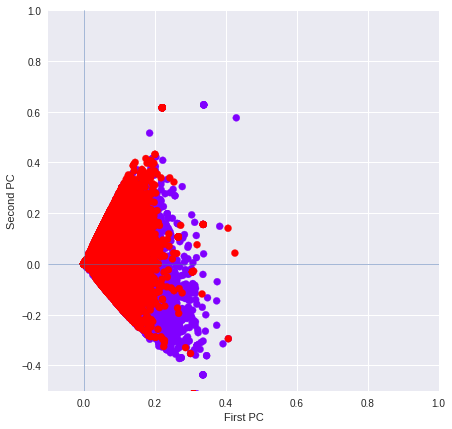

In [62]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

In [64]:
eg_mask = latent_semantic_analysis['class_numerical'] == 0

In [72]:
latent_semantic_analysis[eg_mask].head()

,component_1,component_2,cleaned_text,class_numerical
0,0.061393,-0.004337,أزاي أقول لك كنا زمان والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ح يفوت علينا ولا ندري,0
1,0.084400,-0.005516,هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…,0
2,0.046988,0.007810,أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…,0
3,0.065853,0.012307,أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر,0
4,0.098459,-0.019688,التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك,0


## Trying with stop words

In [68]:
df_stops = df

In [73]:
df_stops.shape

(192936, 2)

In [75]:
stop_words_df = pd.read_pickle('/home/jovyan/capstone-52/topic_modeling_experiments/pickled_stopwords/comp_study_stopwords.p')

In [77]:
stop_words_df.columns = ["stop_words"]

In [78]:
stop_words_df.head()

,stop_words
0,انها
1,اثناء
2,اجل
3,احدا
4,احدى


In [79]:
dfList_stopwords = stop_words_df['stop_words'].tolist()

In [80]:
dfList_stopwords[:4]

['انها', 'اثناء', 'اجل', 'احدا']

In [81]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words= dfList_stopwords)

In [82]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df_stops.cleaned_text)

In [83]:
document_term_matrix_sps

<192936x222182 sparse matrix of type '<class 'numpy.float64'>'
	with 1457237 stored elements in Compressed Sparse Row format>

In [84]:
svd_matrix = SVD.fit_transform(document_term_matrix_sps)

In [85]:
SVD.explained_variance_ratio_

array([ 0.00222738,  0.00268812])

In [86]:
svd_matrix[:4]

array([[ 0.04082972, -0.01387216],
       [ 0.04087351, -0.02763706],
       [ 0.00636876, -0.00160183],
       [ 0.02005658, -0.00750572]])

In [87]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=df_stops.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class_numerical'] = df['class_numerical']

In [161]:
latent_semantic_analysis.sample(5)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,cleaned_text,class_numerical
4288,0.019024,0.013671,-0.011744,0.001878,0.002217,0.002403,0.014322,3.667796e-02,0.098501,0.284591,الف رحمه ونور على قبره يارب,1
70218,0.002161,0.000468,-0.000242,-0.000434,-0.000507,0.000584,0.000235,1.783023e-03,0.000183,-0.000408,الخليجية بالكويت مجلس التعاون الخليجي العنز شكلة نسي اللغة العربية وتفضل الإخوة بتقديم مترجم 🤣🤣🤣 هاي…,1
63316,0.000042,-0.000026,-0.000027,0.000017,0.000018,-0.000007,-0.000001,2.184063e-07,0.000034,-0.000005,اول دعايه لك ابلاش,1
20863,0.069378,0.000198,0.070559,0.003653,-0.010228,0.007312,0.003645,8.460412e-02,-0.017549,-0.011272,، كنت أمانك كنت ذيك ( الكتف اللي لا شعرت بخوف زارك تلتجيها وتسند بروحك | عليها كنت لكن انت ما اشتقت ( لمكانك…,1
39883,0.002208,-0.000921,-0.000510,-0.000723,0.001228,-0.000789,0.000508,6.851513e-04,-0.000051,0.000072,قبل اسبوع لسا ماوصلت,1


In [89]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [91]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

In [92]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)

,component_1,component_2,abs_component_1,abs_component_2
لا,0.518254,0.105352,0.518254,0.105352
الله,0.369440,0.829098,0.369440,0.829098
مش,0.322185,-0.259193,0.322185,0.259193
والله,0.276050,-0.201317,0.276050,0.201317
كدا,0.264707,-0.208186,0.264707,0.208186
بس,0.243035,-0.168330,0.243035,0.168330
ولا,0.186206,-0.053097,0.186206,0.053097
ايه,0.179502,-0.153144,0.179502,0.153144
اللي,0.163997,-0.101219,0.163997,0.101219
ده,0.134068,-0.090735,0.134068,0.090735


(-0.5, 1)

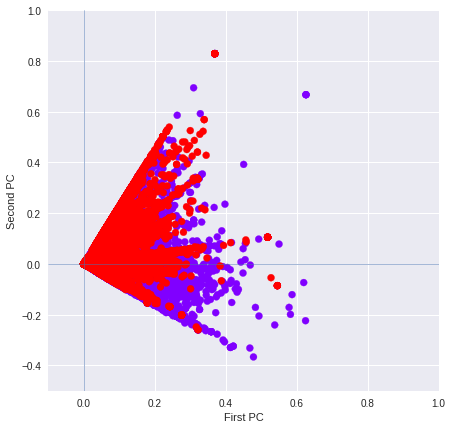

In [93]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

In [104]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [151]:
search_sentences = [
{"sentence": "الثوره المصريه تحولت من ثورة شارع محدش يزعل", "class" : 0},
{"sentence": "نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي", "class" : 0},
{"sentence": "بما أن أغلب اللي متابعني مش بقدر اوصلهم أغلب الوقت. . ف كل يوم هعمل تويته آخر اليوم اللي هيعمل لايك", "class" : 0},
{"sentence": "مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس", "class" : 0},
{"sentence": "عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول", "class" : 0},
{"sentence": "القاضى اللى حكم على المعتقلين بالاعدام هو هو نفس القاضى اللى هيراقب الانتخابات", "class" : 0},
{"sentence": "وفجأة تيجي سيرة حاجة في وسط الكلام تقلب عليك القديم والجديد وترسم في دماغك علامات استفهام مالهاش", "class" : 0},
{"sentence": "السنة اللي فاتت الاعلام الانجليزي قال المفروض بيب يعرف انه في البريمييرليج لازم يتأقلم و يلعب كورتنا", "class" : 0},
{"sentence": "حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم ", "class" : 1},
{"sentence": "من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين", "class" : 1},
{"sentence": "شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ ", "class" : 1},
{"sentence": "ذويه ارفضوا لانه عيار جمبازي مافيه شي وبليس مايكسر اماعينه يامال لضعفه قطو بو سبعة ارواح ", "class" : 1},
{"sentence": "صج ياجماعه في سوال محيرني ليش المتان مافيهم النفسيه عكس الضعاف تقول خاشوقه ومنفس", "class" : 1},
{"sentence": "لم نعاند التاريخ مسيو خاشوقه بل الواقع والعقلانية ابعدنا من التدمير والانفلات", "class" : 1},
{"sentence": "أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني", "class" : 1},
{"sentence": "قبل ماتتكلمين يالطيبه افهمي السالفه ومنب ملزومه بسنابي اني اشرح كل شيء صارت بالتفصيل بس لانك قلق خل", "class" : 1},
]

In [152]:
search_sentences_df = pd.DataFrame(search_sentences)

In [153]:
docs_test = search_sentences_df['sentence']

In [160]:
text_clf.predict(docs_test)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [155]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42)),
                    ])
text_clf.fit(df['cleaned_text'], df['class_numerical'])  

predicted = text_clf.predict(docs_test)
np.mean(predicted == search_sentences_df['class']) 

0.8125

In [156]:
predicted = text_clf.predict(docs_test)

In [158]:
from sklearn import metrics
print(metrics.classification_report(search_sentences_df['class'], predicted, 
                                    target_names=['EG',"GULF"]))

             precision    recall  f1-score   support

         EG       1.00      0.62      0.77         8
       GULF       0.73      1.00      0.84         8

avg / total       0.86      0.81      0.81        16



In [159]:
metrics.confusion_matrix(search_sentences_df['class'], predicted)

array([[5, 3],
       [0, 8]])

In [30]:
import lda

In [144]:
svd_array = np.asarray(svd_matrix, dtype='int64') 

In [147]:
type(svd_array)

numpy.ndarray

In [146]:
x

INFO:lda:n_documents: 192936
INFO:lda:vocab_size: 10
INFO:lda:n_words: 7362
INFO:lda:n_topics: 3
INFO:lda:n_iter: 1000


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'